# Experiment 10 - 2 zeroshot learning evaluation

In [1]:
import numpy as np
import torch
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from model import analysis
from model import task
from importlib import reload
import tools
import pandas as pd
analysis = reload(analysis)
sns.set_style("whitegrid")

In [2]:
datadir = '../../data/model_results/experiment10/'
palette = sns.color_palette("Set2")


# Load data

In [15]:
simstart = 0 
simend = 20

df_adam0 = pd.read_csv(datadir + 'expt10_adam_zeroshot_2layers_2rulepretraining_simData' + str(simstart) + '.csv')
df_adam0.insert(len(df_adam0.columns),"Simulation",list(np.repeat(simstart,len(df_adam0))),True)
df_adam0.insert(len(df_adam0.columns),"Layers",list(np.repeat(2,len(df_adam0))),True)
df_adam0.insert(len(df_adam0.columns),"Training",list(np.repeat('Simple task pretraining',len(df_adam0))),True)
#
df_adam0_1rule = pd.read_csv(datadir + 'expt10_adam_zeroshot_2layers_pretraining_simData' + str(simstart) + '.csv')
df_adam0_1rule.insert(len(df_adam0_1rule.columns),"Simulation",list(np.repeat(simstart,len(df_adam0_1rule))),True)
df_adam0_1rule.insert(len(df_adam0_1rule.columns),"Layers",list(np.repeat(2,len(df_adam0_1rule))),True)
df_adam0_1rule.insert(len(df_adam0_1rule.columns),"Training",list(np.repeat('Concept pretraining',len(df_adam0_1rule))),True)
#
df_adam0_nopretraining = pd.read_csv(datadir + 'expt10_adam_zeroshot_2layers_simData' + str(simstart) + '.csv')
df_adam0_nopretraining.insert(len(df_adam0_nopretraining.columns),"Simulation",list(np.repeat(simstart,len(df_adam0_nopretraining))),True)
df_adam0_nopretraining.insert(len(df_adam0_nopretraining.columns),"Layers",list(np.repeat(2,len(df_adam0_nopretraining))),True)
df_adam0_nopretraining.insert(len(df_adam0_nopretraining.columns),"Training",list(np.repeat('Vanilla',len(df_adam0_nopretraining))),True)
#
df_adam0_combined = pd.read_csv(datadir + 'expt10_adam_zeroshot_2layers_pretraining_2rulepretraining_simData' + str(simstart) + '.csv')
df_adam0_combined.insert(len(df_adam0_combined.columns),"Simulation",list(np.repeat(simstart,len(df_adam0_combined))),True)
df_adam0_combined.insert(len(df_adam0_combined.columns),"Layers",list(np.repeat(2,len(df_adam0_combined))),True)
df_adam0_combined.insert(len(df_adam0_combined.columns),"Training",list(np.repeat('Combined',len(df_adam0_combined))),True)

for i in range(simstart+1,simend):
    ####
    # 2 layers
    #
    tmp = pd.read_csv(datadir + 'expt10_adam_zeroshot_2layers_2rulepretraining_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Layers",list(np.repeat(2,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Training",list(np.repeat('Simple task pretraining',len(tmp))),True)
    tmp['LogicAvg'] = tmp[['LogicPS1', 'LogicPS2']].mean(axis=1)
    tmp['SensoryAvg'] = tmp[['SensoryPS1', 'SensoryPS2']].mean(axis=1)
    tmp['MotorAvg'] = tmp[['MotorPS1', 'MotorPS2']].mean(axis=1)
    tmp['PSavg'] = tmp[['LogicAvg', 'SensoryAvg','MotorAvg']].mean(axis=1)
    df_adam0 = df_adam0.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt10_adam_zeroshot_2layers_pretraining_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Layers",list(np.repeat(2,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Training",list(np.repeat('Concept pretraining',len(tmp))),True)
    tmp['LogicAvg'] = tmp[['LogicPS1', 'LogicPS2']].mean(axis=1)
    tmp['SensoryAvg'] = tmp[['SensoryPS1', 'SensoryPS2']].mean(axis=1)
    tmp['MotorAvg'] = tmp[['MotorPS1', 'MotorPS2']].mean(axis=1)
    tmp['PSavg'] = tmp[['LogicAvg', 'SensoryAvg','MotorAvg']].mean(axis=1)
    df_adam0_1rule = df_adam0_1rule.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt10_adam_zeroshot_2layers_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Layers",list(np.repeat(2,len(tmp))),True)    
    tmp.insert(len(tmp.columns),"Training",list(np.repeat('Vanilla',len(tmp))),True)
    tmp['LogicAvg'] = tmp[['LogicPS1', 'LogicPS2']].mean(axis=1)
    tmp['SensoryAvg'] = tmp[['SensoryPS1', 'SensoryPS2']].mean(axis=1)
    tmp['MotorAvg'] = tmp[['MotorPS1', 'MotorPS2']].mean(axis=1)
    tmp['PSavg'] = tmp[['LogicAvg', 'SensoryAvg','MotorAvg']].mean(axis=1)
    df_adam0_nopretraining = df_adam0_nopretraining.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt10_adam_zeroshot_2layers_pretraining_2rulepretraining_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Layers",list(np.repeat(2,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Training",list(np.repeat('Combined',len(tmp))),True)
    tmp['LogicAvg'] = tmp[['LogicPS1', 'LogicPS2']].mean(axis=1)
    tmp['SensoryAvg'] = tmp[['SensoryPS1', 'SensoryPS2']].mean(axis=1)
    tmp['MotorAvg'] = tmp[['MotorPS1', 'MotorPS2']].mean(axis=1)
    tmp['PSavg'] = tmp[['LogicAvg', 'SensoryAvg','MotorAvg']].mean(axis=1)
    df_adam0_combined = df_adam0_combined.append(tmp)
    
    
df_adam0.Accuracy = df_adam0.Accuracy.values*100.0
df_adam0_1rule.Accuracy = df_adam0_1rule.Accuracy.values*100.0
df_adam0_nopretraining.Accuracy = df_adam0_nopretraining.Accuracy.values*100.0
df_adam0_combined.Accuracy = df_adam0_combined.Accuracy.values*100.0
df_all = pd.concat([df_adam0_nopretraining,df_adam0_1rule,df_adam0,df_adam0_combined])

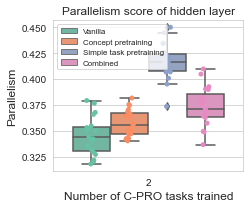

In [17]:
plt.figure(figsize=(3.5,3))
ax = sns.boxplot(x="Layers",y="PSavg",hue='Training',palette='Set2',data=df_all)
sns.stripplot(x="Layers",y="PSavg",hue='Training',palette='Set2',dodge=True,data=df_all)
plt.title('Parallelism score of hidden layer', fontsize=12)
plt.xlabel('Number of C-PRO tasks trained', fontsize=12)
plt.ylabel('Parallelism', fontsize=12)
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);
# plt.ylim([0,.5])
plt.legend()
# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:4], labels[0:4],fontsize=8)
# plt.ylim([0,.5])


plt.tight_layout()
# plt.savefig('ModelPS_Average.png', dpi=300)

/Users/colelab/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 35.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


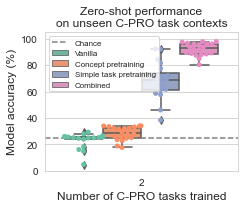

In [19]:
plt.figure(figsize=(3.5,3))
sns.boxplot(x="Layers",y="Accuracy",hue='Training',palette='Set2',data=df_all)
ax = sns.swarmplot(x="Layers",y="Accuracy",hue='Training',palette='Set2',data=df_all,dodge=True)
plt.plot(np.arange(-0.5,2.5),np.repeat(25.0,3),'gray',linestyle='--',label='Chance')
plt.title('Zero-shot performance\non unseen C-PRO task contexts', fontsize=12)
plt.xlabel('Number of C-PRO tasks trained', fontsize=12)
plt.ylabel('Model accuracy (%)', fontsize=12)
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);
# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:5], labels[0:5],fontsize=8)
plt.ylim([0,105])
plt.tight_layout()
# plt.savefig('ModelPerformance.png', dpi=300)